In [ ]:
#Importing the Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Data Loading and Preprocessing**

In [ ]:
train_data_path="/content/drive/My Drive/Colab Notebooks/Bengaluru_House_Data.csv"
train_data=pd.read_csv(train_data_path)

In [ ]:
train_data.head(70)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
65,Super built-up Area,Ready To Move,Doddathoguru,2 BHK,NaN,1100,2.0,1.0,62.00
66,Super built-up Area,18-Apr,Gunjur,2 BHK,BMineis,1140,2.0,3.0,43.00
67,Super built-up Area,Ready To Move,Marathahalli,2 BHK,NaN,1220,2.0,1.0,57.00
68,Plot Area,Ready To Move,Devarachikkanahalli,8 Bedroom,NaN,1350,7.0,0.0,85.00


In [ ]:
train_data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
train_data.shape

(13320, 9)

In [ ]:
train_data.area_type.head(10)

0    Super built-up  Area
1              Plot  Area
2          Built-up  Area
3    Super built-up  Area
4    Super built-up  Area
5    Super built-up  Area
6    Super built-up  Area
7    Super built-up  Area
8    Super built-up  Area
9              Plot  Area
Name: area_type, dtype: object

In [ ]:
#oneHotEncoding the area_type
from sklearn.preprocessing import LabelBinarizer
lbinarizer=LabelBinarizer()
area_type_encoded=lbinarizer.fit_transform(train_data.area_type)
train_data.drop(["area_type"],axis=1,inplace=True)


In [ ]:
df_encoded=pd.DataFrame(area_type_encoded)
df_encoded

,0,1,2,3
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
13315,1,0,0,0
13316,0,0,0,1
13317,1,0,0,0
13318,0,0,0,1


In [ ]:
train_data.insert(loc=0,value=df_encoded[0],column="Built-up  Area")
train_data.insert(loc=1,value=df_encoded[1],column="Carpet  Area")
train_data.insert(loc=2,value=df_encoded[1],column="Plot  Area")
train_data.insert(loc=3,value=df_encoded[1],column="Super built-up  Area")




In [ ]:
train_data

,Built-up Area,Carpet Area,Plot Area,Super built-up Area,availability,location,size,society,total_sqft,bath,balcony,price
0,0,0,0,0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,0,0,0,0,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,1,0,0,0,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,0,0,0,0,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,0,0,0,0,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,1,0,0,0,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,0,0,0,0,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,1,0,0,0,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,0,0,0,0,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
i=0
for sample in train_data.availability:
  if(sample != str("Ready To Move")):
    train_data.availability[i]="NO"
    i=i+1
  else:
    i=i+1
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train_data.availability.unique()
lbinarizer_availaibiltiy=LabelBinarizer()

avail_encoded=lbinarizer_availaibiltiy.fit_transform(train_data.availability)



In [ ]:
avail_encoded=pd.DataFrame(avail_encoded)
train_data.drop(["availability"],axis=1,inplace=True)

In [ ]:
train_data.insert(loc=4,value=avail_encoded,column="Ready_to Move")


In [ ]:
train_data.location.fillna(value="Whitefield",inplace=True)

In [ ]:
train_data.isnull().sum()

Built-up  Area             0
Carpet  Area               0
Plot  Area                 0
Super built-up  Area       0
Ready_to Move              0
location                   0
size                      16
society                 5502
total_sqft                 0
bath                      73
balcony                  609
price                      0
dtype: int64

In [ ]:
train_data.shape

(13320, 12)

In [ ]:

train_data=train_data.loc[train_data["size"].notnull()]


In [ ]:
train_data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
i=0
bedroom=[]
hall=[]
kitchen=[]
sample_decoded_zero=[]
sample_decoded_one=[]
for sample in train_data["size"]:
  sample_decoded=str(sample).split(" ")
  sample_decoded_zero.append(sample_decoded[0])
  sample_decoded_one.append(sample_decoded[1])

  if(sample_decoded[1]=="BHK" or sample_decoded[1]=="Bedroom" ):
    hall.append(1)
    kitchen.append(1)
  elif(sample_decoded[1]=="RK"):
    hall.append(0)
    kitchen.append(1)
  
  bedroom.append(int(sample_decoded[0]))




In [ ]:
bedroom=pd.DataFrame(bedroom)
kitchen=pd.DataFrame(kitchen)
hall=pd.DataFrame(hall)

In [ ]:

train_data.insert(loc=6,value=bedroom,column="Bedroom")
train_data.insert(loc=7,value=hall,column="Hall")
train_data.insert(loc=8,value=bedroom,column="Kitchen")

In [ ]:
train_data.drop(["size"],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_data.drop(["bath"],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_data.isnull().sum()


Built-up  Area             0
Carpet  Area               0
Plot  Area                 0
Super built-up  Area       0
Ready_to Move              0
location                   0
Bedroom                   16
Hall                      16
Kitchen                   16
society                 5499
total_sqft                 0
balcony                  593
price                      0
dtype: int64

In [ ]:
train_data.Bedroom.fillna(value=np.mean(train_data.Bedroom),inplace=True)
train_data.Hall.fillna(value=np.mean(train_data.Hall),inplace=True)
train_data.Kitchen.fillna(value=np.mean(train_data.Kitchen),inplace=True)
train_data.balcony.fillna(value=np.mean(train_data.balcony),inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
train_data.isnull().sum()

Built-up  Area             0
Carpet  Area               0
Plot  Area                 0
Super built-up  Area       0
Ready_to Move              0
location                   0
Bedroom                    0
Hall                       0
Kitchen                    0
society                 5499
total_sqft                 0
balcony                    0
price                      0
dtype: int64

In [ ]:
train_data

,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Ready_to Move,location,Bedroom,Hall,Kitchen,society,total_sqft,balcony,price
0,0,0,0,0,0,Electronic City Phase II,2.000000,1.000000,2.000000,Coomee,1056,1.000000,39.07
1,0,0,0,0,1,Chikka Tirupathi,4.000000,1.000000,4.000000,Theanmp,2600,3.000000,120.00
2,1,0,0,0,1,Uttarahalli,3.000000,1.000000,3.000000,NaN,1440,3.000000,62.00
3,0,0,0,0,1,Lingadheeranahalli,3.000000,1.000000,3.000000,Soiewre,1521,1.000000,95.00
4,0,0,0,0,1,Kothanur,2.000000,1.000000,2.000000,NaN,1200,1.000000,51.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,1,0,0,0,1,Whitefield,2.803958,0.999022,2.803958,ArsiaEx,3453,0.000000,231.00
13316,0,0,0,0,1,Richards Town,2.803958,0.999022,2.803958,NaN,3600,1.584376,400.00
13317,1,0,0,0,1,Raja Rajeshwari Nagar,2.803958,0.999022,2.803958,Mahla T,1141,1.000000,60.00
13318,0,0,0,0,0,Padmanabhanagar,2.803958,0.999022,2.803958,SollyCl,4689,1.000000,488.00


In [ ]:
lbinarizer_location=LabelBinarizer()
encoded_location=lbinarizer_location.fit_transform(train_data.location)

In [ ]:
encoded_location=pd.DataFrame(encoded_location)

In [ ]:
df=train_data.groupby(train_data.location).mean()

In [ ]:
df=df.sort_values(by="price")

In [ ]:
df

,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Ready_to Move,Bedroom,Hall,Kitchen,balcony,price
location,,,,,,,,,,
Alur,0.333333,0.0,0.0,0.0,1.000000,3.333333,1.0,3.333333,1.000000,15.000000
Anekal,1.000000,0.0,0.0,0.0,1.000000,4.000000,1.0,4.000000,1.000000,16.000000
Makali,0.000000,0.0,0.0,0.0,1.000000,2.000000,1.0,2.000000,1.000000,16.000000
BAGUR,0.000000,0.0,0.0,0.0,1.000000,2.000000,1.0,2.000000,1.000000,17.000000
Celebrity Paradise Layout,0.500000,0.0,0.0,0.0,1.000000,2.500000,1.0,2.500000,1.000000,19.245000
...,...,...,...,...,...,...,...,...,...,...
Church Street,0.500000,0.0,0.0,0.0,0.000000,3.000000,1.0,3.000000,2.000000,1068.000000
Yemlur,0.222222,0.0,0.0,0.0,0.666667,2.888889,1.0,2.888889,1.861459,1093.388889
Defence Colony,0.285714,0.0,0.0,0.0,1.000000,2.142857,1.0,2.142857,2.107590,1167.714286


In [ ]:
sorted_price=list(df["price"])
sorted_location=list(df.index)


In [ ]:
dict_location_avg_price=dict(zip(sorted_location,sorted_price))

In [ ]:

for key in dict_location_avg_price:
  val=key
  i=0
  for i in range(0,len(train_data.location)):
    try:
      if(key==train_data.location[i]):
        print("Sample==",sample," key=",key," initial_value=",train_data.location[i],"updated=",dict_location_avg_price[key],"location=",i)
        
        train_data.location[i]=dict_location_avg_price[key]
        i=i+1
        
          
      
      else:
        if(i>=13304):
          print("Not Matached",key)
      
        
        i=i+1
    
    except Exception as e:
      pass


Sample== 1 BHK  key= Alur  initial_value= Alur updated= 15.0 location= 970
Sample== 1 BHK  key= Alur  initial_value= Alur updated= 15.0 location= 7482
Sample== 1 BHK  key= Alur  initial_value= Alur updated= 15.0 location= 8242


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Streaming output truncated to the last 5000 lines.
Sample== 1 BHK  key= Hennur Road  initial_value= Hennur Road updated= 103.50753289473683 location= 8967
Sample== 1 BHK  key= Hennur Road  initial_value= Hennur Road updated= 103.50753289473683 location= 9179
Sample== 1 BHK  key= Hennur Road  initial_value= Hennur Road updated= 103.50753289473683 location= 9207
Sample== 1 BHK  key= Hennur Road  initial_value= Hennur Road updated= 103.50753289473683 location= 9279
Sample== 1 BHK  key= Hennur Road  initial_value= Hennur Road updated= 103.50753289473683 location= 9421
Sample== 1 BHK  key= Hennur Road  initial_value= Hennur Road updated= 103.50753289473683 location= 9622
Sample== 1 BHK  key= Hennur Road  initial_value= Hennur Road updated= 103.50753289473683 location= 9666
Sample== 1 BHK  key= Hennur Road  initial_value= Hennur Road updated= 103.50753289473683 location= 9735
Sample== 1 BHK  key= Hennur Road  initial_value= Hennur Road updated= 103.50753289473683 location= 9805
Sample== 1 BH

In [ ]:
train_data.drop(["society"],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dict_location_avg_price["Doddathoguru"]

43.413

In [ ]:
train_data.location.unique()

array([48.31666666666667, 115.01588235294118, 61.252526881720435,
       115.34826086956521, 95.63030303030304, 128.12208333333334,
       184.080303030303, 327.69308411214956, 102.21371428571427, 240.0,
       100.52295302013424, 61.017291666666665, 94.40676829268293,
       68.82897959183673, 41.72509803921569, 64.71403508771934,
       662.8571428571429, 81.875, 61.441506849315076, 150.19571428571427,
       82.72559829059826, 91.19333333333331, 26.166666666666668,
       51.833333333333336, 54.972384105960266, 131.6758,
       86.44464622641509, 160.81491525423726, 127.96875,
       70.53379120879119, 55.10181818181818, 132.65765957446808,
       71.17033333333333, 102.57142857142857, 119.38154911838794, 66.3,
       100.16981132075472, 43.413, 84.62961538461539, 130.33333333333334,
       50.0, 100.04469387755101, 97.13888888888889, 58.17321428571428,
       120.20569767441859, 207.5, 68.89442857142856, 61.07971428571428,
       99.21545454545458, 55.666666666666664, 100.0, 137.95

In [ ]:
list1=['Raja Rajeshwari Nagar',
       'Hulimavu', 'Rajarajeshwari Nagara', 'Billekahalli',
       'Bannerghatta Road', 'Yeshwanthpur', 'Rachenahalli',
       'Ramamurthy Nagar', 'Bellandur', 'Uttarahalli',
       'Green Glen Layout', 'Whitefield', 'Richards Town',
       'Padmanabhanagar', 'Doddathoguru']

In [ ]:
train_data.total_sqft.unique().shape

(2110,)

In [ ]:
"""train_data
  for i in range(0,len(train_data.location)):
    try:
      if(key==val):
        print("Sample==",sample," key=",key," initial_value=",train_data.location[i],"updated=",dict_location_avg_price[key],"location=",i)
        
        train_data.location[i]=
        i=i+1
        
          
      
      else:
        if(i>=13304):
          print("Not Matached",key)
      
        
        i=i+1
    
    except Exception as e:
      pass"""


'train_data\n  for i in range(0,len(train_data.location)):\n    try:\n      if(key==val):\n        print("Sample==",sample," key=",key," initial_value=",train_data.location[i],"updated=",dict_location_avg_price[key],"location=",i)\n        \n        train_data.location[i]=\n        i=i+1\n        \n          \n      \n      else:\n        if(i>=13304):\n          print("Not Matached",key)\n      \n        \n        i=i+1\n    \n    except Exception as e:\n      pass'

In [ ]:
def convert_to_float(sample):

  val=str(sample)
  return_val=0
  if(val[-5]=="M"):
    
    val=float(val[:-9])
    return_val=val

  elif(val[-5]=="Y"):
    
    val=float(val[:-9])
    return_val=val
    
  elif(val[-5:]=="Acres"):
    
    val=float(val[:-5])
    return_val=val
    

  elif(val[-5:]=="Perch"):
    val=float(val[:-5])
    return_val=val
    
  elif(val[-6:]=="Guntha"):
    val=float(val[:-6])
    return_val=val
    
  elif(val[-5:]=="Cents"):
    val=float(val[:-5])
    
  elif(val[-7:]=="Grounds"):
    val=float(val[:-7])
    return_val=val
    
  else:
    divide=sample.split("-")
    val1=float(divide[0].strip())
    val2=float(divide[1].strip())
    mean_val=(val1+val2)/2
    return_val=mean_val
 
  return return_val
    

In [ ]:
float_value=[]
int_value=[]
i=0
string_value=[]
for sample in train_data.total_sqft:
  try:
    x=float(sample)
    
  except Exception as e:
    x=convert_to_float(sample)
  
  float_value.append(x)


In [ ]:
"""sample="2100 - 2850","34.46Sq. Meter","4125Perch","1100Sq. Yards","5.31Acres","24Guntha","1500Cents","Grounds"
sample[7][:-7]"""


'sample="2100 - 2850","34.46Sq. Meter","4125Perch","1100Sq. Yards","5.31Acres","24Guntha","1500Cents","Grounds"\nsample[7][:-7]'

In [ ]:
"""def convert_to_float(sample)
i=0
for sample in string_value:
  val=str(sample)
  if(val[-5]=="M"):
    
    val=float(val[:-9])
    
    string_value[i]=(val*10.7639)
    i=i+1
  elif(val[-5]=="Y"):
    
    val=float(val[:-9])
    string_value[i]=(val*9)
    i=i+1
  elif(val[-5:]=="Acres"):
    
    val=float(val[:-5])
    string_value[i]=(val*43560)
    i=i+1

  elif(val[-5:]=="Perch"):
    val=float(val[:-5])
    string_value[i]=(val*272.25)
    i=i+1
  elif(val[-6:]=="Guntha"):
    val=float(val[:-6])
    string_value[i]=(val*1089)
    i=i+1
  elif(val[-5:]=="Cents"):
    val=float(val[:-5])
    string_value[i]=(val*435.6)
    i=i+1
  elif(val[-7:]=="Grounds"):
    val=float(val[:-7])
    string_value[i]=(val*2400)
    i=i+1

  else:
    divide=sample.split("-")
    val1=float(divide[0].strip())
    val2=float(divide[1].strip())
    mean_val=(val1+val2)/2
    string_value[i]=mean_val
    i=i+1"""

'def convert_to_float(sample)\ni=0\nfor sample in string_value:\n  val=str(sample)\n  if(val[-5]=="M"):\n    \n    val=float(val[:-9])\n    \n    string_value[i]=(val*10.7639)\n    i=i+1\n  elif(val[-5]=="Y"):\n    \n    val=float(val[:-9])\n    string_value[i]=(val*9)\n    i=i+1\n  elif(val[-5:]=="Acres"):\n    \n    val=float(val[:-5])\n    string_value[i]=(val*43560)\n    i=i+1\n\n  elif(val[-5:]=="Perch"):\n    val=float(val[:-5])\n    string_value[i]=(val*272.25)\n    i=i+1\n  elif(val[-6:]=="Guntha"):\n    val=float(val[:-6])\n    string_value[i]=(val*1089)\n    i=i+1\n  elif(val[-5:]=="Cents"):\n    val=float(val[:-5])\n    string_value[i]=(val*435.6)\n    i=i+1\n  elif(val[-7:]=="Grounds"):\n    val=float(val[:-7])\n    string_value[i]=(val*2400)\n    i=i+1\n\n  else:\n    divide=sample.split("-")\n    val1=float(divide[0].strip())\n    val2=float(divide[1].strip())\n    mean_val=(val1+val2)/2\n    string_value[i]=mean_val\n    i=i+1'

In [ ]:
sq_foot=pd.DataFrame(float_value)


In [ ]:
train_data.insert(loc=9,value=sq_foot,column="Square_foot_Area")

In [ ]:
train_data.drop(["total_sqft"],inplace=True,axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_data.head(5)

,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Ready_to Move,location,Bedroom,Hall,Kitchen,Square_foot_Area,balcony,price
0,0,0,0,0,0,48.3167,2.0,1.0,2.0,1056.0,1.0,39.07
1,0,0,0,0,1,115.016,4.0,1.0,4.0,2600.0,3.0,120.00
2,1,0,0,0,1,61.2525,3.0,1.0,3.0,1440.0,3.0,62.00
3,0,0,0,0,1,115.348,3.0,1.0,3.0,1521.0,1.0,95.00
4,0,0,0,0,1,95.6303,2.0,1.0,2.0,1200.0,1.0,51.00


In [ ]:
X=train_data.iloc[:13000,:10]
y=train_data.iloc[:13000,-1:]

In [ ]:
X

,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Ready_to Move,location,Bedroom,Hall,Kitchen,Square_foot_Area
0,0,0,0,0,0,48.3167,2.0,1.0,2.0,1056.0
1,0,0,0,0,1,115.016,4.0,1.0,4.0,2600.0
2,1,0,0,0,1,61.2525,3.0,1.0,3.0,1440.0
3,0,0,0,0,1,115.348,3.0,1.0,3.0,1521.0
4,0,0,0,0,1,95.6303,2.0,1.0,2.0,1200.0
...,...,...,...,...,...,...,...,...,...,...
13011,0,0,0,0,1,86.4446,4.0,1.0,4.0,4395.0
13012,0,0,0,0,1,119.571,2.0,1.0,2.0,950.0
13013,0,0,0,0,1,327.693,4.0,1.0,4.0,2710.0
13014,1,0,0,0,1,137.956,3.0,1.0,3.0,1936.0


TypeError: ignored

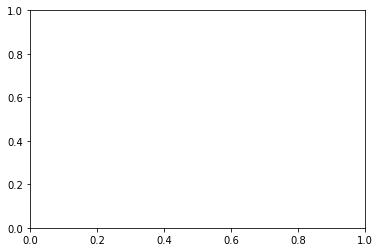

In [ ]:
import seaborn as sns
sns.boxplot(train_data)

In [ ]:
float_loc=[]
for sample in X.location:
  float_loc.append(float(sample))


In [ ]:
float_loc=pd.DataFrame(float_loc)


In [ ]:
X.insert(loc=5,value=float_loc,column="New_Location")

In [ ]:
X.drop(["location"],axis=1,inplace=True)

In [ ]:
X

,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Ready_to Move,New_Location,Bedroom,Hall,Kitchen,Square_foot_Area
0,0,0,0,0,0,48.316667,2.0,1.0,2.0,1056.0
1,0,0,0,0,1,115.015882,4.0,1.0,4.0,2600.0
2,1,0,0,0,1,61.252527,3.0,1.0,3.0,1440.0
3,0,0,0,0,1,115.348261,3.0,1.0,3.0,1521.0
4,0,0,0,0,1,95.630303,2.0,1.0,2.0,1200.0
...,...,...,...,...,...,...,...,...,...,...
13011,0,0,0,0,1,NaN,4.0,1.0,4.0,4395.0
13012,0,0,0,0,1,NaN,2.0,1.0,2.0,950.0
13013,0,0,0,0,1,NaN,4.0,1.0,4.0,2710.0
13014,1,0,0,0,1,NaN,3.0,1.0,3.0,1936.0


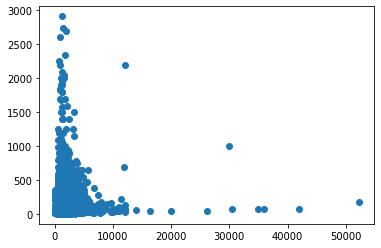

In [ ]:
plt.scatter((X.Square_foot_Area),y)

In [ ]:
from sklearn.impute import SimpleImputer
simpute=SimpleImputer(strategy="mean")

In [ ]:
X=simpute.fit_transform(X)
y=simpute.fit_transform(y)

In [ ]:
X

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 2.000e+00,
        1.056e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 4.000e+00,
        2.600e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 3.000e+00,
        1.440e+03],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 4.000e+00,
        2.710e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 3.000e+00,
        1.936e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 2.000e+00,
        1.075e+03]])

In [ ]:
x_df=pd.DataFrame(X)
x_df

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,48.316667,2.0,1.0,2.0,1056.0
1,0.0,0.0,0.0,0.0,1.0,115.015882,4.0,1.0,4.0,2600.0
2,1.0,0.0,0.0,0.0,1.0,61.252527,3.0,1.0,3.0,1440.0
3,0.0,0.0,0.0,0.0,1.0,115.348261,3.0,1.0,3.0,1521.0
4,0.0,0.0,0.0,0.0,1.0,95.630303,2.0,1.0,2.0,1200.0
...,...,...,...,...,...,...,...,...,...,...
12995,0.0,0.0,0.0,0.0,1.0,112.444513,4.0,1.0,4.0,4395.0
12996,0.0,0.0,0.0,0.0,1.0,112.444513,2.0,1.0,2.0,950.0
12997,0.0,0.0,0.0,0.0,1.0,112.444513,4.0,1.0,4.0,2710.0
12998,1.0,0.0,0.0,0.0,1.0,112.444513,3.0,1.0,3.0,1936.0


In [ ]:
pd.DataFrame(X).shape

(13000, 10)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
minmaxscaler=MinMaxScaler()

In [ ]:
X=minmaxscaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
y_test.shape

(3900, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error



In [ ]:
#fitting to linearRegression
lr_regressor=LinearRegression()
score=cross_val_score(lr_regressor,X_train,y_train,cv=5)


In [ ]:
score

array([ 0.00050782,  0.00099756,  0.00364034,  0.00440857, -0.00303037])

In [ ]:
hist=lr_regressor.fit(X_train,y_train)

In [ ]:
y_pred=lr_regressor.predict(X_test)

In [ ]:
r2_score(y_pred=y_pred,y_true=y_test)

0.0022435148305762764

In [ ]:
mean_absolute_error(y_pred,y_test)

73.2959588311219

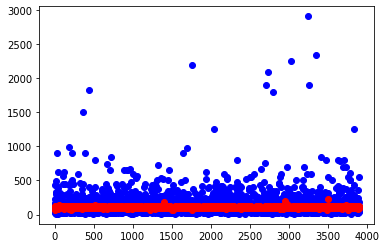

In [ ]:
plt.scatter(np.arange(len(y_test)),y_test,color="blue")
plt.scatter(np.arange(len(y_pred)),y_pred,color="red")

In [ ]:
#using ploynomial Regression
from sklearn.preprocessing import PolynomialFeatures
ploy=PolynomialFeatures(degree=6)

In [ ]:
X_poly_train=ploy.fit_transform(X_train)
X_poly_test=ploy.fit_transform(X_test)

In [ ]:
lr_regressor.fit(X_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_pRegressor=lr_regressor.predict(X_poly_test)

In [ ]:
r2_score(y_pred_pRegressor,y_test)

-3.881699180063869e-05

In [ ]:
mean_absolute_error(y_pred_pRegressor,y_test)

1100338.2290239437

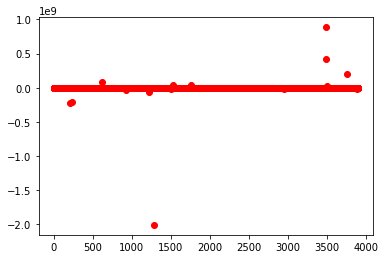

In [ ]:
plt.scatter(np.arange(len(y_test)),y_test,color="blue")
plt.scatter(np.arange(len(y_pred)),y_pred_pRegressor,color="red")

In [ ]:
import xgboost as xgb
xg_reg=xgb.XGBRegressor()

In [ ]:
xg_reg.fit(X_train,y_train)

[05:52:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xg_reg.feature_importances_

array([0.06973268, 0.07769296, 0.        , 0.        , 0.22129154,
       0.22019553, 0.1774868 , 0.        , 0.        , 0.2336005 ],
      dtype=float32)

In [ ]:
y_pred=xg_reg.predict(X_test)

In [ ]:
import math
math.sqrt(mean_squared_error(y_pred,y_test))

149.600565594767

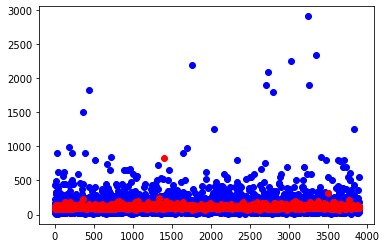

In [ ]:
plt.scatter(np.arange(len(y_test)),y_test,color="blue")
plt.scatter(np.arange(len(y_pred)),y_pred,color="red")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=4,max_features=8)
dt.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(y_pred,y_test))

150.8857954711373

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)

In [ ]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred=lasso.predict(X_test)

In [ ]:
r2_score(y_pred,y_test)

-574.755865385821

In [ ]:
math.sqrt(mean_squared_error(y_pred,y_test))

148.4816725772136

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr=SVR(kernel="rbf",degree=2,epsilon=0.01)
svr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.01, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred=svr.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(y_pred,y_test))

154.29685902930157